In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
MAX_BATCH_SIZE = 9
GPUS = 32
ORG_NAME = "DEAD FoundationsDAO"
SPLITS_FREQ = "2d"
LAST_FOLDS = 20
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2021-11-28"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071154
2020-11-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068785
2020-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068717
2020-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068438
2020-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067741
2022-07-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069502
2022-07-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067749


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071687
2020-11-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072127
2020-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071596
2020-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071640
2020-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071644
2022-07-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072368
2022-07-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072020


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2020-11-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071154,openpop
2020-11-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068785,openpop
2020-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068717,openpop
2020-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068438,openpop
2020-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067622,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067741,openpop
2022-07-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069502,openpop
2022-07-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067749,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-10-23,1.0,7d,2021-10-23,0.000890,0.000649,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069600,itemknn,test,NaN
2021-10-25,15.0,10YE,2021-10-25,0.015036,0.001259,3.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068809,itemknn,test,NaN
2021-10-27,10.0,7d,2021-10-27,0.379489,0.015602,728.0,448.0,586.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009756,0.024390,0.302439,0.130662,itemknn,test,NaN
2021-10-29,1.0,10YE,2021-10-29,0.678786,0.019572,1118.0,1112.0,1114.857143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.171626,itemknn,test,NaN
2021-10-31,5.0,60d,2021-10-31,1.204925,0.087348,550.0,509.0,547.380952,0.015873,0.005291,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.534647,itemknn,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-20,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.000000,0.018939,...,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.213903,openpop,NaN,NaN
2021-11-22,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.011628,0.023256,...,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.221119,openpop,NaN,NaN
2021-11-24,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.169336,openpop,NaN,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-10-23,1.0,7d,2021-10-23,0.000890,0.000649,0.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069600,itemknn,test,NaN
2021-10-25,15.0,10YE,2021-10-25,0.015036,0.001259,3.0,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068809,itemknn,test,NaN
2021-10-27,10.0,7d,2021-10-27,0.379489,0.015602,728.0,448.0,586.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.009756,0.024390,0.302439,0.130662,itemknn,test,NaN
2021-10-29,1.0,10YE,2021-10-29,0.678786,0.019572,1118.0,1112.0,1114.857143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.171626,itemknn,test,NaN
2021-10-31,5.0,60d,2021-10-31,1.204925,0.087348,550.0,509.0,547.380952,0.015873,0.005291,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.534647,itemknn,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-20,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.000000,0.018939,...,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.213903,openpop,NaN,NaN
2021-11-22,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.011628,0.023256,...,0.333333,0.666667,0.666667,0.666667,0.666667,0.666667,0.221119,openpop,NaN,NaN
2021-11-24,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.169336,openpop,NaN,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

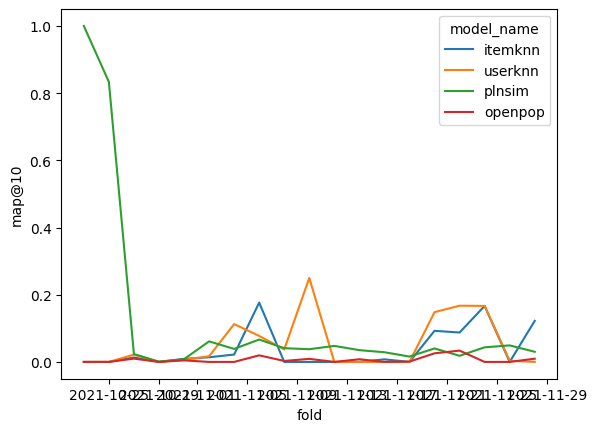

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2021-10-21,1,7d,2021-10-21,0.005595,0.001176,1,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070121
2021-10-23,15,10YE,2021-10-23,0.002328,0.001175,0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068301
2021-10-25,10,7d,2021-10-25,0.001326,0.000684,3,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068059
2021-10-27,1,10YE,2021-10-27,0.432727,0.015860,728,448.0,586.333333,0.000000,0.111111,0.133333,0.066667,...,0.003252,0.003252,0.089431,0.000000,0.004878,0.009756,0.009756,0.009756,0.268293,0.145196
2021-10-29,5,60d,2021-10-29,0.721890,0.016835,1118,1112.0,1114.857143,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.171578
2021-10-31,9,7d,2021-10-31,1.241170,0.082268,550,509.0,547.380952,0.015873,0.005291,0.003175,0.006349,...,0.043651,0.059524,0.265152,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.517652
2021-11-02,8,14d,2021-11-02,1.481462,0.026198,204,194.0,199.000000,0.000000,0.000000,0.033333,0.016667,...,0.055556,0.055556,0.367063,0.000000,0.000000,NaN,NaN,NaN,NaN,0.135070
2021-11-04,1,60d,2021-11-04,1.581360,0.033493,76,71.0,74.600000,0.000000,0.000000,0.000000,0.030000,...,0.233333,0.333333,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.121129
2021-11-06,1,10YE,2021-11-06,1.535865,0.028864,32,25.0,29.142857,0.285714,0.095238,0.057143,0.085714,...,0.452381,0.666667,1.000000,0.416667,0.416667,0.416667,0.416667,0.416667,0.416667,0.132640
